In [102]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

current_dir = os.getcwd()
os.chdir('D:\Anupam_Technical\Coursera\Anupam_ANG_ML\AndrewNG_ML_Exercises\ex1\data')
print(current_dir)
inputDF = pd.read_csv('ex1data1.txt', sep=',', header=None, names=['Population','Profit'])
inputDF.head()

D:\Anupam_Technical\Coursera\Anupam_ANG_ML\AndrewNG_ML_Exercises\ex1\data


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [103]:
# the feature matrix X
X = inputDF.iloc[:, 0:1].values
one_vector = np.ones(len(X)).reshape(len(X), 1)
X = np.concatenate((one_vector, X), axis=1)
# the vector y
y = inputDF.iloc[:, 1:2].values
m = len(X)

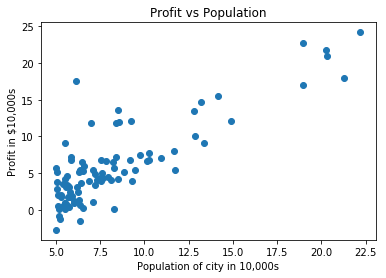

In [104]:
# do an EDA by plotting the data
def plot_data(X, y):    
    plt.scatter(X[:, 1], y)
    plt.xlabel('Population of city in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title("Profit vs Population")         

plot_data(X, y)
plt.show()

In [105]:
# the vectorized cost function
def compute_cost(X, theta, y):
    J = 0            
    J = np.dot(np.transpose((np.dot(X, theta) - y)), (np.dot(X, theta) - y))
    return J[0][0] / (2 * m)      
    
# now initialize theta with all zeros
theta = np.zeros(2).reshape(2,1)
initial_cost = compute_cost(X, theta, y)
print("cost with theta values set to {} : {}".format(theta, initial_cost))
theta2 = np.array([[-1],[2]])
initial_cost2 = compute_cost(X, theta2, y)
print("cost with theta values set to {} : {}".format(theta2, initial_cost2))


cost with theta values set to [[0.]
 [0.]] : 32.07273387745567
cost with theta values set to [[-1]
 [ 2]] : 54.24245508201238


In [106]:
# the gradient descent (vectorized version)
# alpha = learning rate
# m = no. of training examples
# theta = theta - (alpha / m) * [Xtranspose * (X.theta - y)]

def gradient_descent(X, y, theta, alpha, no_iters):
    J_history = np.zeros((no_iters, 1))
    for iteration in range(no_iters):
        J_history[iteration] = compute_cost(X, theta, y)        
        h = np.dot(X, theta)        
        err = h - y
        theta_err = alpha * (np.dot(np.transpose(X), err) / m)
        theta = theta - theta_err
    return theta, J_history   

# initialize the learning rate and no of iterations for gradient descent
alpha = 0.01
no_iters = 1500
print('Running gradient descent on training dataset')
result_theta, J_history = gradient_descent(X, y, theta, alpha, no_iters)
print("Theta found by gradient descent:\n {}".format(result_theta))
print("Expected theta value:\n-3.6303\n1.1664\n")

Running gradient descent on training dataset
Theta found by gradient descent:
 [[-3.63029144]
 [ 1.16636235]]
Expected theta value:
-3.6303
1.1664



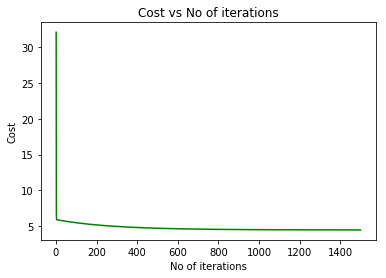

In [107]:
# plot the cost against the number of iterations
def plot_cost_vs_iteration(J_history, no_iters):
    iter_arr = np.arange(1, 1501).reshape(1500,1)
    fig, ax_costiter = plt.subplots()
    ax_costiter.plot(iter_arr, J_history, color='green')
    plt.xlabel('No of iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs No of iterations')
    plt.show()

plot_cost_vs_iteration(J_history, no_iters)

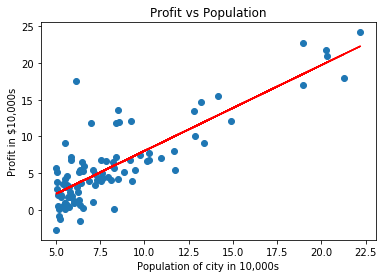

In [108]:
# plot the linear fit
plot_data(X, y)
predicted_profit = np.dot(X, result_theta)
population = X[:, 1]
plt.plot(population, predicted_profit, color='red')
plt.show()

In [109]:
# Make predictions
population1 = np.array([[1, 3.5]])
prediction1 = np.dot(population1, result_theta)
print("For population of 35000 the predicted profit is: {}$".format(prediction1[0,0] * 1000))
population2 = np.array([[1, 7]])
prediction1 = np.dot(population2, result_theta)
print("For population of 70000 the predicted profit is: {}$".format(prediction1[0,0] * 1000))

For population of 35000 the predicted profit is: 451.9767867701767$
For population of 70000 the predicted profit is: 4534.245012944714$


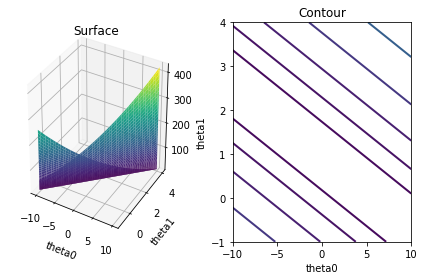

In [110]:
# plot the cost function as a surface as well as a contour plot

def costfunction_3d_plot(X, y, m):
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-1, 4, 100)
    t0, t1 = np.meshgrid(theta0_vals, theta1_vals)
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            temp_theta = np.array([theta0_vals[i], theta1_vals[j]])
            #temp_theta = np.array([t0[i][j], t1[i][j]])
            J_vals[i, j] = compute_cost(X, temp_theta, y)
    J_vals = J_vals.T

    fig = plt.figure()
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.title('Surface')
    ax_contour = fig.add_subplot(122)
    plt.contour(theta0_vals, theta1_vals, J_vals, cmap='viridis', linewidths=2, levels=np.logspace(-2,3,20))
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.title('Contour')
    plt.tight_layout()

costfunction_3d_plot(X, y, m)